In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import utils
import answer_extraction
import seaborn as sns
import os
import json

## Quantitative Results

In [379]:
evalsum_df = pd.read_csv('results/test_accuracy_summary.csv')
evalsum_df

,problem_type,problem_num,gpt4turbo_0shot,gpt4turbo_1shot,gpt4turbo_5shot,gpt4turbo_10shot,gpt3.5turbo_0shot,gpt3.5turbo_1shot,gpt3.5turbo_5shot,gpt3.5turbo_10shot,llama3_0shot,llama3_5shot,llama3_10shot,codellama_0shot,codellama_5shot,codellama_10shot
0,overall,437,13.40,37.6,44.6,NaN,4.54,13.80,24.20,NaN,3.87,21.1,NaN,3.13,10.30,NaN
1,nondimensionalization,200,6.04,36.5,48.6,62.2,5.05,6.11,24.30,31.5,0.50,17.9,29.5,0.00,8.41,11.4
2,root_finding,63,32.10,50.4,58.1,NaN,17.20,28.90,29.30,NaN,11.30,17.5,NaN,8.00,13.10,NaN
3,ode,54,15.70,20.3,21.7,22.2,7.41,14.81,20.37,19.6,10.70,21.9,NaN,14.10,15.30,NaN
4,integral,120,14.90,40.5,41.4,NaN,3.33,18.20,23.10,NaN,2.52,28.1,NaN,0.50,9.57,NaN


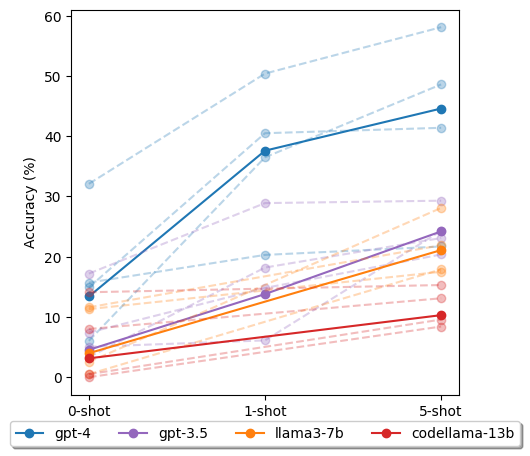

In [339]:
# by model
fig, ax  = plt.subplots(figsize=(5,5))
ax.plot(np.arange(3),evalsum_df.iloc[0,2:5],color = 'tab:blue',marker='o',label ='gpt-4')
for i in range(1,5):
    ax.plot(np.arange(3),evalsum_df.iloc[i,2:5],'--',color = 'tab:blue',marker='o',alpha=0.3)
ax.plot(np.arange(3),evalsum_df.iloc[0,6:9],color = 'tab:purple',marker='o',label ='gpt-3.5')
for i in range(1,5):
    ax.plot(np.arange(3),evalsum_df.iloc[i,6:9],'--',color = 'tab:purple',marker='o',alpha=0.3)
ax.plot([0,2],evalsum_df.iloc[0,10:12],color = 'tab:orange',marker='o',label ='llama3-7b')
for i in range(1,5):
    ax.plot([0,2],evalsum_df.iloc[i,10:12],'--',color = 'tab:orange',marker='o',alpha=0.3)
ax.plot([0,2],evalsum_df.iloc[0,13:15],color = 'tab:red',marker='o',label ='codellama-13b')
for i in range(1,5):
    ax.plot([0,2],evalsum_df.iloc[i,13:15],'--',color = 'tab:red',marker='o',alpha=0.3)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['0-shot','1-shot','5-shot'])
ax.set_ylabel('Accuracy (%)')
#ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

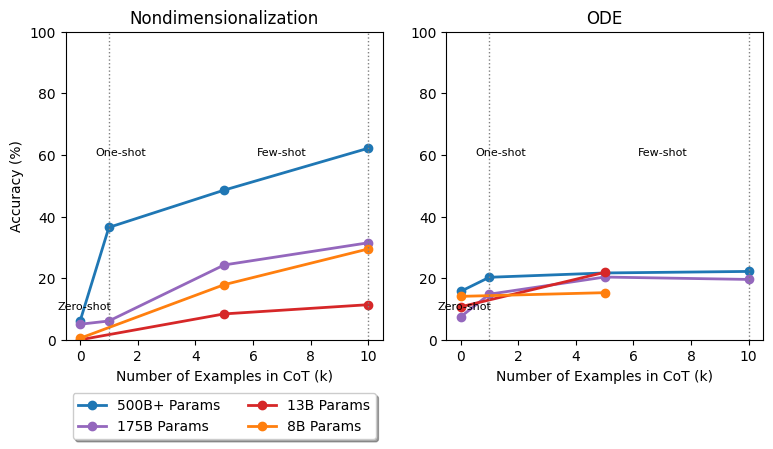

In [380]:
# Nondim 
# Given x values
x1 = np.array([0, 1, 5, 10])  # X-axis: Number of Examples in Context (K)
x2 = np.array([0, 5, 10])  
# Sample y data
y1 = evalsum_df.iloc[1,2:6]  # Y-axis: Accuracy (%) for 500+B Params (with prompt)
y2 = evalsum_df.iloc[1,6:10]  # Y-axis: Accuracy (%) for 175B Params (with prompt)
y3 = evalsum_df.iloc[1,10:13]   # Y-axis: Accuracy (%) for 8B Params (with prompt)
y4 = evalsum_df.iloc[1,13:16]   # Y-axis: Accuracy (%) for 13B Params (with prompt)

z1 = evalsum_df.iloc[3,2:6]  # Y-axis: Accuracy (%) for 500+B Params (with prompt)
z2 = evalsum_df.iloc[3,6:10]  # Y-axis: Accuracy (%) for 175B Params (with prompt)
z3 = evalsum_df.iloc[3,10:13]   # Y-axis: Accuracy (%) for 8B Params (with prompt)
z4 = evalsum_df.iloc[3,13:16]   # Y-axis: Accuracy (%) for 13B Params (with prompt)


# Plotting
fig, ax= plt.subplots(1, 2, figsize=(9, 4))

ax[0].plot(x1, y1, label='500B+ Params', color='tab:blue', marker = 'o',linewidth=2)
ax[0].plot(x1, y2, label='175B Params', color='tab:purple', marker = 'o',linewidth=2)
ax[0].plot(x2, y4, label='13B Params', color='tab:red', marker = 'o',linewidth=2)
ax[0].plot(x2, y3, label='8B Params', color='tab:orange', marker = 'o',linewidth=2)
ax[1].plot(x1, z1, label='500B+ Params', color='tab:blue', marker = 'o',linewidth=2)
ax[1].plot(x1, z2, label='175B Params', color='tab:purple', marker = 'o',linewidth=2)
ax[1].plot(x2, z3, label='13B Params', color='tab:red', marker = 'o',linewidth=2)
ax[1].plot(x2, z4, label='8B Params', color='tab:orange', marker = 'o',linewidth=2)
#plt.plot(x, y1_no_prompt, '--', color='tab:purple', linewidth=1.5)
#plt.plot(x, y2_no_prompt, '--', color='tab:orange', linewidth=1.5)
#plt.plot(x, y3_no_prompt, '--', color='tab:red', linewidth=1.5)

# Annotations for Zero-shot, One-shot, Few-shot
for i in range(2):
    ax[i].text(0.15, 10, 'Zero-shot', ha='center', fontsize=8)
    ax[i].text(1.4, 60, 'One-shot', ha='center', fontsize=8)
    ax[i].text(7, 60, 'Few-shot', ha='center', fontsize=8)
    ax[i].axvline(x=1, color='gray', linestyle=':', linewidth=1)
    ax[i].axvline(x=10, color='gray', linestyle=':', linewidth=1)




# Labels and Titles
ax[0].set_xlabel('Number of Examples in CoT (k)')
ax[1].set_xlabel('Number of Examples in CoT (k)')
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_title('Nondimensionalization')
ax[1].set_title('ODE')
#plt.xscale('log')
#plt.xticks([0.1, 1, 5, 10], labels=['0', '1', '5', '10'])  # Custom x-ticks
ax[0].set_ylim([0, 100])
ax[1].set_ylim([0, 100])

# Legend
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

# Display the plot
#plt.show()


In [ ]:
# TODO: add comparison line with the CoT paper 

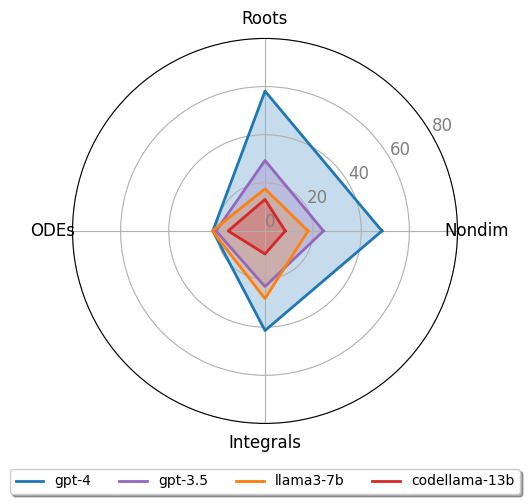

In [346]:

# Data
categories = ['Nondim','Roots','ODEs','Integrals']
num_vars = len(categories)

# Data values for each model
values = [
    list(evalsum_df.iloc[1:5,4]),  # GPT-4
    list(evalsum_df.iloc[1:5,8]),  # Model 2
    list(evalsum_df.iloc[1:5,11]),   # Model 3
    list(evalsum_df.iloc[1:5,14])  # Model 4
]

# Repeat the first value to close the circular graph
values = [v + [v[0]] for v in values]

# Compute angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='black', size=12)


# Draw ylabels
ax.set_rlabel_position(30)
plt.yticks([0, 20, 40,60,80], ['0','20','40','60','80'], color="grey", size=12)
plt.ylim(0, 80)

# Plot data
colors = ['tab:blue', 'tab:purple', 'tab:orange', 'tab:red']
names = ['gpt-4', 'gpt-3.5', 'llama3-7b', 'codellama-13b']
for i in range(len(values)):
    ax.plot(angles, values[i], linewidth=2, linestyle='solid', color=colors[i],label=names[i])
    ax.fill(angles, values[i], color=colors[i], alpha=0.25)

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.show()


## Qualitative Analysis

#### Score breakdown 

In [366]:
def calculate_accuracy_breakdown(question_types, json_name):
    accuracy_breakdown = []
    
    for question_type in question_types:
        json_path = f'results/responses/{question_type}/{question_type}_{json_name}.json'
        
        if os.path.exists(json_path):
            problem_response = utils.read_json(json_path)
            accuracy_breakdown.append(answer_extraction.categorize_scores(problem_response))
        else:
            accuracy_breakdown.append([0, 0, 0])  # Assuming there are 3 categories: incorrect, partial, correct
    
    accuracy_breakdown = np.array(accuracy_breakdown)
    
    nondim = np.sum(accuracy_breakdown[:2], axis=0)
    integral = np.sum(accuracy_breakdown[-2:], axis=0)
    
    accuracy_breakdown_new = np.vstack((nondim, accuracy_breakdown[2:-2], integral))
    
    return accuracy_breakdown_new

question_types = ['nondimensionalization_symbolic', 'nondimensionalization_numeric', 'polynomial_roots', 'ode', 'laplace_integral', 'traditional_integral']
json_name = '0shot_gpt4'

accuracy_breakdown_new = calculate_accuracy_breakdown(question_types, json_name)

In [105]:
def calculate_percentages(accuracy_breakdown_new, categories):
    # Extract data
    incorrect = accuracy_breakdown_new[:, 0]
    partial = accuracy_breakdown_new[:, 1]
    correct = accuracy_breakdown_new[:, 2]
    
    # Calculate totals
    total = incorrect + partial + correct
    
    # Calculate percentages
    incorrect_percentage = (incorrect / total) * 100
    partial_percentage = (partial / total) * 100
    correct_percentage = (correct / total) * 100
    
    return incorrect_percentage, partial_percentage, correct_percentage
categories = ['Nondim','Roots', 'ODEs', 'Integrals']
incorrect_percentage, partial_percentage, correct_percentage = calculate_percentages(accuracy_breakdown_new, categories)

In [106]:
incorrect_percentage

array([75.66137566, 37.93103448, 34.69387755, 60.90909091])

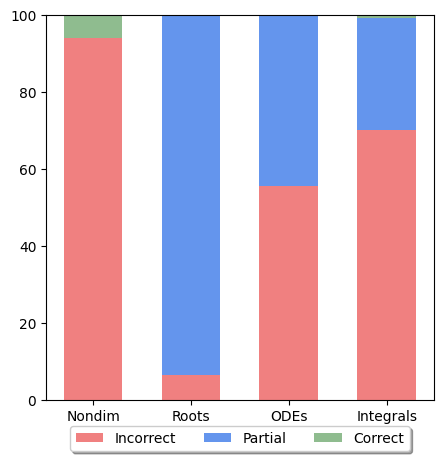

In [13]:
# Stacked bar plot
fig, ax = plt.subplots(figsize=(5, 5))

bar_width = 0.6
indices = np.arange(len(categories))

p1 = ax.bar(indices, incorrect_percentage, bar_width, label='Incorrect',color='lightcoral')
p2 = ax.bar(indices, partial_percentage, bar_width, bottom=incorrect_percentage, label='Partial',color = 'cornflowerblue')
p3 = ax.bar(indices, correct_percentage, bar_width, bottom=incorrect_percentage + partial_percentage, label='Correct',color='darkseagreen')

#ax.set_xlabel('Problem Types')
#ax.set_ylabel('Percentage')
#ax.set_title('Stacked Bar Plot of Problem Types')
ax.set_xticks(indices)
ax.set_xticklabels(categories)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylim([0,100])
# Show the plot
plt.show()


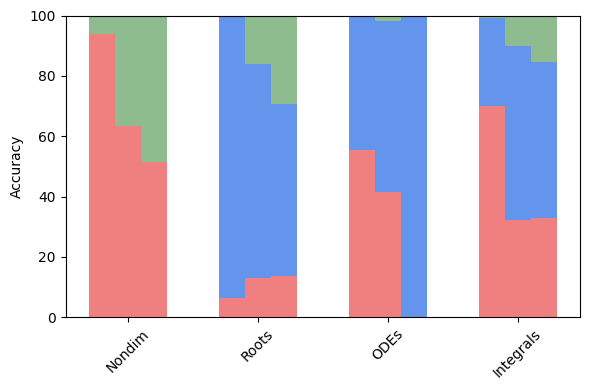

In [352]:
def load_plot_grouped_bar_chart(question_types,categories, models, shot_types):
    x = np.arange(len(categories))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    
    for i, model in enumerate(models):
        for j, shot_type in enumerate(shot_types):
            json_name = shot_type +'_'+ model
            accuracy_breakdown_new = calculate_accuracy_breakdown(question_types, json_name)
            if not np.any(accuracy_breakdown_new):
                continue
            incorrect_percentage, partial_percentage, correct_percentage = calculate_percentages(accuracy_breakdown_new, categories)
            offset = (i * len(shot_types) + j) * width - (len(models) * len(shot_types) * width) / 2 + width / 2
            #print(correct_percentage)
            ax.bar(x + offset, incorrect_percentage, width, label=f'{model} - {shot_type} - Incorrect', color='lightcoral')
            ax.bar(x + offset, partial_percentage, width, bottom=incorrect_percentage, label=f'{model} - {shot_type} - Partial', color='cornflowerblue')
            ax.bar(x + offset, correct_percentage, width, bottom=incorrect_percentage + partial_percentage, label=f'{model} - {shot_type} - Correct', color='darkseagreen')


    #ax.set_xlabel('Problem Subtypes')
    ax.set_ylabel('Accuracy')
    #ax.set_title('Correctness Percentage by Model and Shot Type')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    #ax.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming correct_percentage is a 3D array of shape (num_models, num_shot_types, num_categories)
question_types = ['nondimensionalization_symbolic', 'nondimensionalization_numeric', 'polynomial_roots', 'ode', 'laplace_integral', 'traditional_integral']
#models = ['gpt4', 'gpt3.5', 'llama3', 'codellama']
models = ['gpt4']
shot_types = ['0shot', '1shot', '5shot']
#shot_types = ['0shot', '5shot']
categories = ['Nondim', 'Roots', 'ODEs', 'Integrals']

# Example usage
load_plot_grouped_bar_chart(question_types, categories, models, shot_types)


#### Examine error reasons

In [367]:
def get_problem_numbers_with_zero_score(question_type,json_name,score):
    json_path = f'results/responses/{question_type}/{question_type}_{json_name}.json'
    with open(json_path, 'r') as file:
        data = json.load(file)
    
    selected_problems = [problem_number for problem_number, details in data.items() if details.get('score') == score]
    
    return data, selected_problems

# Example usage
question_type = 'polynomial_roots'
data, problem_num = get_problem_numbers_with_zero_score(question_type,json_name,1)
print(problem_num)


[]


In [368]:
response = data['218']['grade_response']
latex_response = response.replace(r'\[', ' $').replace(r'\]', '$ ').replace(r'\(', ' $').replace(r'\)', ' $').replace('$\\', ' $').replace('$','$ ')
utils.display_content(latex_response)

<IPython.core.display.Latex object>

"Let's analyze the response based on the given criteria and compare it to the ground truth for both small and large epsilon limits.\n\n### Large ε Limit\n**Response:**\n $ \n\\text{No meaningful single-term approximation beyond } 0.\n$  \n\n**Ground Truth:**\n $ \n\\left[ - \\sqrt[8]{- \\frac{1}{\\epsilon}}, \\ \\sqrt[8]{- \\frac{1}{\\epsilon}}, \\ - i \\sqrt[8]{- \\frac{1}{\\epsilon}}, \\ i \\sqrt[8]{- \\frac{1}{\\epsilon}}, \\ \\frac{\\sqrt{2} \\sqrt[8]{- \\frac{1}{\\epsilon}} \\left(-1 - i\\right)}{2}, \\ \\frac{\\sqrt{2} \\sqrt[8]{- \\frac{1}{\\epsilon}} \\left(-1 + i\\right)}{2}, \\ \\frac{\\sqrt{2} \\sqrt[8]{- \\frac{1}{\\epsilon}} \\left(1 - i\\right)}{2}, \\ \\frac{\\sqrt{2} \\sqrt[8]{- \\frac{1}{\\epsilon}} \\left(1 + i\\right)}{2} \\right]\n$  \n\nThe response does not match or even partially match the ground truth for the large epsilon limit. Therefore, no credit can be given here.\n\n### Small ε Limit\n**Response:**\n $ \n[e^{i\\pi/3}, e^{2i\\pi/3}, e^{3i\\pi/3}, e^{4i\\pi/

In [369]:
incorrect = accuracy_breakdown_new[:, 0]
partial = accuracy_breakdown_new[:, 1]
correct = accuracy_breakdown_new[:, 2]

In [372]:
# breakdown analysis for roots type
incorrect_roots = incorrect[1]
partial_roots = partial[1]
correct_roots = correct[1]
inner_sizes = [correct_roots, partial_roots-1, incorrect_roots]
norm_inner_sizes = inner_sizes / np.sum(inner_sizes)*2*np.pi
plot_inner = np.cumsum(np.append(0,norm_inner_sizes.flatten()[:-1]))
# number 23, 5, 4 acquired by human examination of answers
#outer_sizes = [correct_roots, 23, 5, 4, incorrect_roots]
outer_sizes = [correct_roots, 41, 17, 4]
norm_outer_sizes = outer_sizes / np.sum(outer_sizes)*2*np.pi
plot_outer = np.cumsum(np.append(0,norm_outer_sizes.flatten()[:-1]))

In [373]:
norm_outer_sizes

array([0.        , 4.15500964, 1.72280887, 0.40536679])

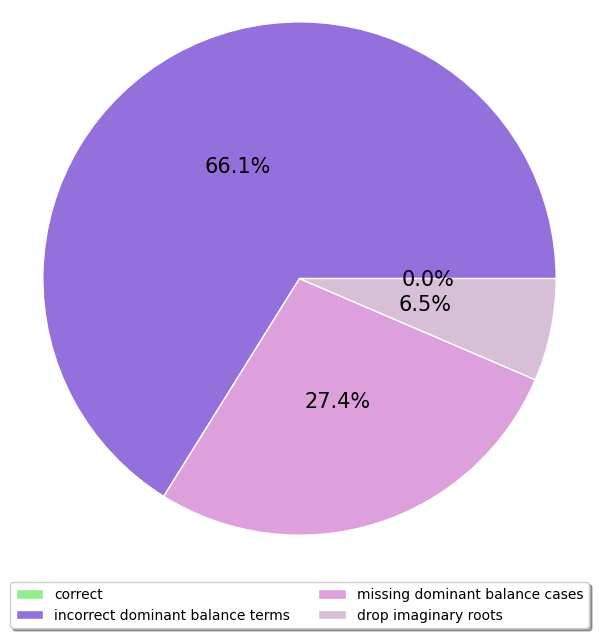

In [376]:
# Creating dataset
size = 6

# Creating plot
fig, ax = plt.subplots(figsize=(7, 7),
					subplot_kw=dict(polar=True))

# Calculating the percentage for each sector
percentages = [size * 100 for size in norm_outer_sizes/(2*np.pi)]


bars = ax.bar(x=plot_outer,
	width=norm_outer_sizes,
	bottom=1-size,
	height=size,
	color=['lightgreen','mediumpurple','plum','thistle'],
	edgecolor='w',
	linewidth=1,
	align="edge")

# Adding percentage text on each sector
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height / 2 + bar.get_y(),
            f'{percentages[i]:.1f}%',
            ha='center', va='center', color='black', fontsize=15)

# Adding a legend
labels = ['correct','incorrect dominant balance terms','missing dominant balance cases','drop imaginary roots']
for bar, label in zip(bars, labels):
    bar.set_label(label)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

#ax.set(title="Detailed Error Types")
ax.set_axis_off()

# show plot
plt.show()
